In [1]:
import os
import sys
sys.path.append(os.path.abspath("/app"))

import time
import urllib
import requests
from splinter import Browser
from selenium import webdriver
from IPython.display import Image
from time import sleep
from configs.config import \
    client_id, \
    redirect_uri, \
    td_username, \
    td_pass, \
    td_sec_q1_a, \
    td_sec_q2_a, \
    td_sec_q3_a, \
    td_sec_q4_a

https://auth.tdameritrade.com/auth?response_type=code&redirect_uri=https%3A%2F%2Flocalhost&client_id=JVUVOS0KRBS79WRW1LXPMRBLOAJGF68L%40AMER.OAUTHAP
https://auth.tdameritrade.com/auth
https://auth.tdameritrade.com/auth


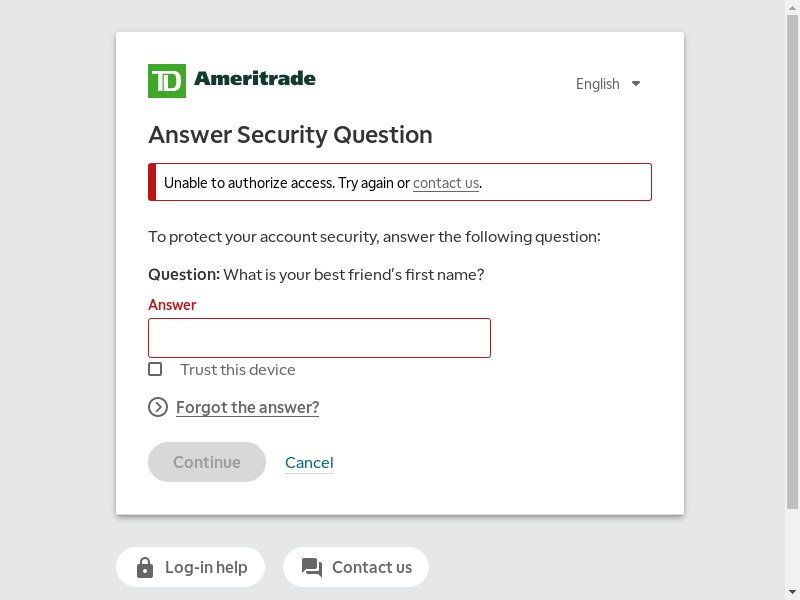

In [11]:
options = webdriver.ChromeOptions()
options.add_argument("--headless")
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")

browser = Browser('chrome', options=options)

method = 'GET'
url = "https://auth.tdameritrade.com/auth"

payload = {
    "response_type": "code",
    "redirect_uri": redirect_uri,
    "client_id": client_id + "@AMER.OAUTHAP"
}

built_url = requests.Request(method, url, params=payload).prepare().url

print(built_url)

browser.visit(built_url)

browser.find_by_id("username0").fill(td_username)
browser.find_by_id("password").fill(td_pass)
browser.find_by_id("accept").first.click()


sleep(1)

new_url = browser.driver.current_url
print(url)

browser.find_by_text("Can't get the text message?").first.click()
browser.find_by_name("init_secretquestion").first.click()

sleep(1)

browser.find_by_id("secretquestion0").fill(td_sec_q2_a)
browser.driver.find_elements_by_class_name("checkboxContainer")[0].click()
browser.find_by_id("accept").first.click()

sleep(1)

browser.find_by_id("accept").first.click()

# sleep(10)

new_url = browser.driver.current_url
print(url)

browser.driver.save_screenshot('test.png')
Image(filename='test.png') 

In [2]:
endpoint = "https://api.tdameritrade.com/v1/marketdata/{symbol}/pricehistory".format(symbol="GOOG")

params = {
    "apikey": client_id,
    "periodType": "day",
    "period": '2',
    "frequency": '1',
    "frequencyType": "minute",
    "endDate": "1607827279000",
    "startDate": "1606790479000",
    "needExtendedHoursData": "true"
}

resp = requests.get(url=endpoint, params=params)
data = resp.json()

In [32]:
endpoint = "https://api.tdameritrade.com/v1/marketdata/{symbol}/quotes".format(symbol="GOOG")

params = {"apikey": client_id}

resp = requests.get(url=endpoint, params=params)
data = resp.json()

dict

In [30]:
endpoint = "https://api.tdameritrade.com/v1/marketdata/quotes"

params = {
    "apikey": client_id,
    "symbol": "GOOG,MSFT,AAPL,PINS"
}

resp = requests.get(url=endpoint, params=params)
data = resp.json()
data

{'GOOG': {'assetType': 'EQUITY',
  'assetMainType': 'EQUITY',
  'cusip': '02079K107',
  'symbol': 'GOOG',
  'description': 'Alphabet Inc. - Class C Capital Stock',
  'bidPrice': 1756.78,
  'bidSize': 200,
  'bidId': 'P',
  'askPrice': 1773.3,
  'askSize': 200,
  'askId': 'P',
  'lastPrice': 1764.01,
  'lastSize': 0,
  'lastId': 'P',
  'openPrice': 0.0,
  'highPrice': 0.0,
  'lowPrice': 0.0,
  'bidTick': ' ',
  'closePrice': 1760.0601,
  'netChange': 3.95,
  'totalVolume': 16,
  'quoteTimeInLong': 1608028502749,
  'tradeTimeInLong': 1608027474625,
  'mark': 1760.06,
  'exchange': 'q',
  'exchangeName': 'NASD',
  'marginable': True,
  'shortable': True,
  'volatility': 0.0,
  'digits': 4,
  '52WkHigh': 1847.2,
  '52WkLow': 1013.536,
  'nAV': 0.0,
  'peRatio': 34.16,
  'divAmount': 0.0,
  'divYield': 0.0,
  'divDate': '',
  'securityStatus': 'Normal',
  'regularMarketLastPrice': 1760.0601,
  'regularMarketLastSize': 1739,
  'regularMarketNetChange': 0.0,
  'regularMarketTradeTimeInLong': 

In [49]:
endpoint = "https://api.tdameritrade.com/v1/marketdata/{symbol}/pricehistory".format(symbol="SPY")

params = {
    "apikey": client_id,
    "period": '1',
    "periodType": "day",
    "frequency": '1',
    "frequencyType": "minute",
    "startDate": strtotime("11/01/2020"),
    "endDate": strtotime("11/03/2020"),
    "needExtendedHoursData": "true"
}

resp = requests.get(url=endpoint, params=params)
data = resp.json()

data

{'candles': [{'open': 326.76,
   'high': 326.76,
   'low': 325.45,
   'close': 325.45,
   'volume': 496,
   'datetime': 1604278800000},
  {'open': 325.5,
   'high': 325.5,
   'low': 325.5,
   'close': 325.5,
   'volume': 500,
   'datetime': 1604278860000},
  {'open': 325.42,
   'high': 325.42,
   'low': 325.39,
   'close': 325.41,
   'volume': 131,
   'datetime': 1604278920000},
  {'open': 325.41,
   'high': 325.41,
   'low': 325.23,
   'close': 325.39,
   'volume': 124,
   'datetime': 1604278980000},
  {'open': 325.39,
   'high': 325.39,
   'low': 325.36,
   'close': 325.36,
   'volume': 66,
   'datetime': 1604279040000},
  {'open': 325.35,
   'high': 325.41,
   'low': 325.35,
   'close': 325.41,
   'volume': 50,
   'datetime': 1604279100000},
  {'open': 325.41,
   'high': 325.7,
   'low': 325.41,
   'close': 325.7,
   'volume': 263,
   'datetime': 1604279160000},
  {'open': 325.9,
   'high': 325.9,
   'low': 325.8,
   'close': 325.8,
   'volume': 75,
   'datetime': 1604279220000},
  

In [13]:
import time
import datetime

def strtotime(s):
    return int(time.mktime(datetime.datetime.strptime(s, "%m/%d/%Y").timetuple())) * 1000

In [14]:
print(strtotime("12/01/2020"))

1606780800000
